In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from plantcv import plantcv as pcv

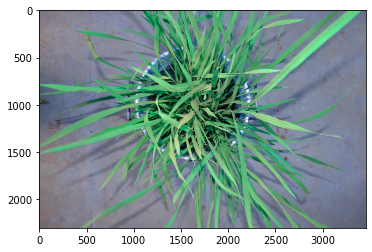

In [14]:
img, path, filename = pcv.readimage(filename='/media/shadowsaint/New Volume/1. RVCE/7th Sem/5. CV/Images/DSC_0007.JPG', mode='rgb')
plt.imshow(img)

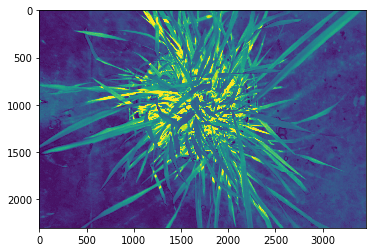

In [15]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
plt.imshow(s)

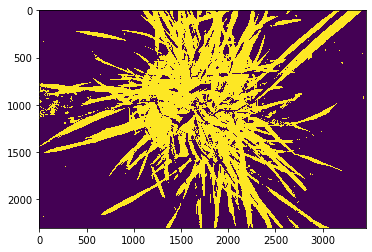

In [16]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')
plt.imshow(s_thresh)

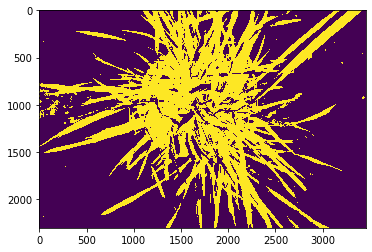

In [18]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)
plt.imshow(s_mblur)

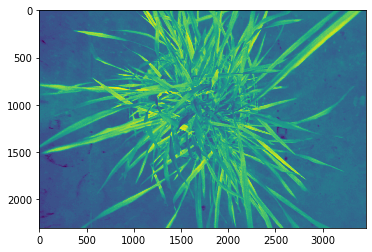

In [20]:
#Approach 2: RGB to LAB
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
plt.imshow(b)

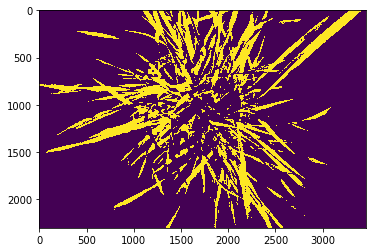

In [21]:
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
plt.imshow(b_thresh)

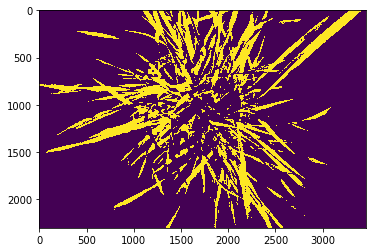

In [22]:
b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
plt.imshow(b_cnt)